<function matplotlib.pyplot.show>

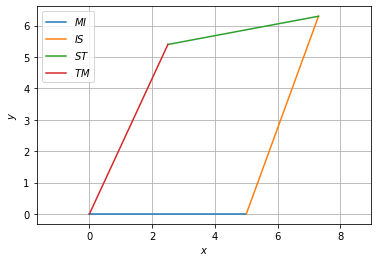

In [6]:
import numpy as np

def dir_vec(A,B):
  return B-A

def norm_vec(A,B):
  return np.matmul(omat, dir_vec(A,B))

#Generate line points
#def line_gen(A,B):
# len =10
# dim = A.shape[0]
# x_AB = np.zeros((dim,len))
# lam_1 = np.linspace(0,1,len)
# for i in range(len):
# temp1 = A + lam_1[i]*(B-A)
# x_AB[:,i]= temp1.T
# return x_AB

#Generate line intercepts
def line_icepts(n,c):
  e1 = np.array([1,0]) 
  e2 = np.array([0,1]) 
  A = c*e1/(n@e1)
  B = c*e2/(n@e2)
  return A,B

#Generate line points
def line_dir_pt(m,A,k1,k2):
  len =10
  dim = A.shape[0]
  x_AB = np.zeros((dim,len))
  lam_1 = np.linspace(k1,k2,len)
  for i in range(len):
    temp1 = A + lam_1[i]*m
    x_AB[:,i]= temp1.T
  return x_AB
#Generate line points

def line_norm_eq(n,c,k):
  len =10
  dim = n.shape[0]
  m = omat@n
  m = m/np.linalg.norm(m)
# x_AB = np.zeros((dim,2*len))
  x_AB = np.zeros((dim,len))
  lam_1 = np.linspace(k[0],k[1],len)
# print(lam_1)
# lam_2 = np.linspace(0,k2,len)
  if c==0:
    for i in range(len):
      temp1 = lam_1[i]*m
      x_AB[:,i]= temp1.T
  else:
    A,B = line_icepts(n,c)
    for i in range(len):
      temp1 = A + lam_1[i]*m
      x_AB[:,i]= temp1.T
# temp2 = B + lam_2[i]*m
# x_AB[:,i+len]= temp2.T
  return x_AB

#def line_dir_pt(m,A, dim):
# len = 10
# dim = A.shape[0]
# x_AB = np.zeros((dim,len))
# lam_1 = np.linspace(0,10,len)
# for i in range(len):
# temp1 = A + lam_1[i]*m
# x_AB[:,i]= temp1.T
# return x_AB


#Generate line points
def line_gen(A,B):
  len =10
  x_AB = np.zeros((2,len))
  lam_1 = np.linspace(0,1,len)
  for i in range(len):
    temp1 = A + lam_1[i]*(B-A)
    x_AB[:,i]= temp1.T
  return x_AB

#Foot of the Altitude
def alt_foot(A,B,C):
  m = B-C
  n = np.matmul(omat,m) 
  N=np.vstack((m,n))
  p = np.zeros(2)
  p[0] = m@A 
  p[1] = n@B
  #Intersection
  P=np.linalg.inv(N.T)@p
  return P

#Intersection of two lines
def line_intersect(n1,c1,n2,c2):
  N=np.vstack((n1,n2))
  p = np.array([c1,c2]) 
  #Intersection
  P=np.linalg.inv(N)@p
# P=np.linalg.inv(N.T)@p
  return P

#Radius and centre of the circumcircle
#of triangle ABC
def ccircle(A,B,C):
  p = np.zeros(2)
  n1 = dir_vec(B,A)
  p[0] = 0.5*(np.linalg.norm(A)*2-np.linalg.norm(B)*2)
  n2 = dir_vec(C,B)
  p[1] = 0.5*(np.linalg.norm(B)*2-np.linalg.norm(C)*2)
  #Intersection
  N=np.vstack((n1,n2))
  O=np.linalg.inv(N)@p
  r = np.linalg.norm(A -O)
  return O,r

#Radius and centre of the incircle
#of triangle ABC
def icentre(A,B,C,k1,k2):
  p = np.zeros(2)
  t = norm_vec(B,C)
  n1 = t/np.linalg.norm(t)
  t = norm_vec(C,A)
  n2 = t/np.linalg.norm(t)
  t = norm_vec(A,B)
  n3 = t/np.linalg.norm(t)
  p[0] = n1@B- k1*n2@C
  p[1] = n2@C- k2*n3@A
  N=np.vstack((n1-k1*n2,n2-k2*n3))
  I=np.matmul(np.linalg.inv(N),p)
  r = n1@(I-B)
  #Intersection
  return I,r

def mult_line(A_I,b_z,k,m):
 for i in range(m):
  if i == 0:
    x = line_norm_eq(A_I[i,:],b_z[i],k[i,:])
  elif i == 1:
    y = line_norm_eq(A_I[i,:],b_z[i],k[i,:])
    z = np.vstack((x[None], y[None]))
  else:
    x = line_norm_eq(A_I[i,:],b_z[i],k[i,:])
    z = np.vstack((z,x[None]))
 return z

dvec = np.array([-1,1]) 
#Orthogonal matrix
omat = np.array([[0,1],[-1,0]])
# -- coding: utf-8 --
"""Assignment2.ipynb
Automatically generated by Colaboratory.
Original file is located at
https://colab.research.google.com/drive/1DP8IWd951P0PLgYxb-NHBOwitaDHh8M6
"""

#Code by Shishir S. Badave
#July 19, 2021
#Drawing a quadrilateral GOLD
import numpy as np
import matplotlib.pyplot as plt


#Quadrilateral vertices
M = np.array([0,0])
I = np.array([5,0])
S = np.array([7.3,6.3]) 
T = np.array([2.5,5.4]) 

import numpy as np

#Generating all lines
x_MI = line_gen(M,I)
x_IS = line_gen(I,S)
x_ST = line_gen(S,T)
x_TM = line_gen(T,M)



#Plotting all lines
plt.plot(x_MI[0,:],x_MI[1,:],label='$MI$')
plt.plot(x_IS[0,:],x_IS[1,:],label='$IS$')
plt.plot(x_ST[0,:],x_ST[1,:],label='$ST$')
plt.plot(x_TM[0,:],x_TM[1,:],label='$TM$')


plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid() # minor
plt.axis('equal')
plt.show